# Lunar Landar Game Normalization

### Min Max Normalization - And Formula | y = (x – min) / (max – min) |

In [2]:
import pandas as pd
from sklearn import preprocessing
from matplotlib import pyplot

In [3]:
# importing game csv file through pandas as a game data frame
game_data_frame = pd.read_csv("ce889_dataCollection.csv")
game_data_frame.head(5)

,x1,x2,y1,y2
0,-209.204,394.690,0.722,-0.090
1,-209.114,393.968,0.636,-0.125
2,-208.989,393.332,0.554,-0.166
3,-208.823,392.778,0.474,-0.214
4,-208.608,392.304,0.397,-0.268


#### Data type of columns

In [4]:
game_data_frame.dtypes

x1    float64
x2    float64
y1    float64
y2    float64
dtype: object

#### Game dataset shape

In [5]:
game_data_frame.shape

(5999, 4)

#### Maximum from each column:

In [6]:
game_data_frame.max()

x1    638.571
x2    580.603
y1      7.995
y2      5.610
dtype: float64

#### Minimum from each column:


In [7]:
game_data_frame.min()

x1   -660.134
x2     65.204
y1     -3.893
y2     -5.423
dtype: float64

#### Checking duplicate values:

In [8]:
#removing duplicates in x1 and x2
game_data_frame.drop_duplicates(subset=["x1","x2"])

,x1,x2,y1,y2
0,-209.204,394.690,0.722,-0.090
1,-209.114,393.968,0.636,-0.125
2,-208.989,393.332,0.554,-0.166
3,-208.823,392.778,0.474,-0.214
4,-208.608,392.304,0.397,-0.268
...,...,...,...,...
5986,20.045,82.044,4.622,-0.021
5987,20.066,77.422,4.722,0.019
5988,20.047,72.700,4.822,-0.021
5989,20.068,67.879,4.922,0.019


In [9]:
game_data_frame.duplicated(keep='last') # We have no any duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
5994     True
5995     True
5996     True
5997     True
5998    False
Length: 5999, dtype: bool

#### Dropping NA values:

In [10]:
game_data_frame.isna().sum() # Checking if there's IsNA or any empty value and printing the count of them

x1    9
x2    9
y1    9
y2    9
dtype: int64

In [11]:
game_data_frame['x1'].fillna((game_data_frame['x1'].mean()), inplace=True)
game_data_frame['x2'].fillna((game_data_frame['x2'].mean()), inplace=True)
game_data_frame['y1'].fillna((game_data_frame['y1'].mean()), inplace=True)
game_data_frame['y2'].fillna((game_data_frame['y2'].mean()), inplace=True)

#### Histogram of data before normalization:

<AxesSubplot:ylabel='Density'>

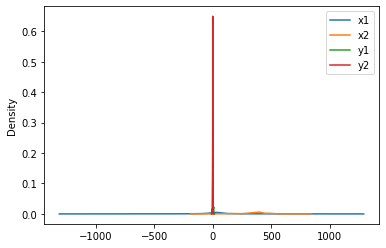

In [14]:
game_data_frame.plot.kde()

In [15]:
# Normalizing dataframe
game_values = game_data_frame.values # Only accessing values of the datafame
min_max_scaler = preprocessing.MinMaxScaler() # Choosing MinMax scaler for normalization between (0-1) 

game_values_scaled = min_max_scaler.fit_transform(game_values) # Scalling the whole data

game_data_frame = pd.DataFrame(game_values_scaled) # Got back my dataframe scaled

#### Training and Validation data partition

In [19]:
train_size = int(len(game_data_frame) * 0.7)
test_size = len(game_data_frame) - train_size
train, test = game_data_frame.iloc[0:train_size,:], game_data_frame.iloc[train_size:len(game_data_frame),:]

#### Histogram of data after normalization:

<AxesSubplot:ylabel='Density'>

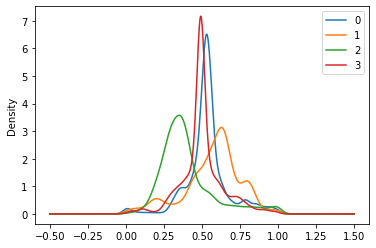

In [16]:
game_data_frame.plot.kde()

In [17]:
game_data_frame.to_csv("game_data_collection.csv", index=False)

In [21]:
train.to_csv("game_training.csv", index=False)
test.to_csv("game_validation.csv", index=False)